In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def mandelbrot_numpy(c, maxiter):
    output = np.zeros(c.shape)
    z = np.zeros(c.shape, np.complex64)
    for it in range(maxiter):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        output[notdone] = it
        z[notdone] = z[notdone]**2 + c[notdone]
    output[output == maxiter-1] = 0
    return output

def mandelbrot_set2(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    n3 = mandelbrot_numpy(c,maxiter)
    return n3.T 

In [ ]:
%%time
res = mandelbrot_set2(-2, 1, -1, 1, 1024, 1024, 255)

In [ ]:
from PIL import Image

In [ ]:
def color_pixel(n, z):
    smoothcolor = n + 1 - math.log(math.log(abs(z)))/math.log(2)
    f = smoothcolor/iterate_max
    i = int(f*500)
    color = palette[i]
    return color

In [ ]:

from math import log, log2

# smooth colored mandelbrot
def mandelbrot(c, MAX_ITER):
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1

    if n == MAX_ITER:
        return MAX_ITER
    
    return n + 1 - log(log2(abs(z)))

In [ ]:
from PIL import Image, ImageDraw

def generate_mbrot(RE_START, RE_END, IM_START, IM_END, WIDTH=512, HEIGHT=512):
    # drawing area
    MAX_ITER = 255  # max iterations allowed
    # image size
    image = Image.new("HSV", (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            # Convert pixel coordinate to complex number
            c = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                        IM_START + (y / HEIGHT) * (IM_END - IM_START))
            m = mandelbrot(c, MAX_ITER)
            hue = int(255 * m / MAX_ITER)
            saturation = 255
            value = 255 if m < MAX_ITER else 0
#             image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16))
            #image.putpixel((x, y), (hue, saturation, value))
            draw.point([x, y], (hue, saturation, value))

    return image.convert('RGB')

In [ ]:
generate_mbrot(-2, 1, -1, 1, 600, 400)

In [ ]:
from IPython.display import display # to display images

In [ ]:
r = res.max() - res.min()

In [ ]:
res = ((res - res.min()) / r) * 255.0

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(res,cmap='gray')


In [ ]:
# smooth iteration count
# https://iquilezles.org/www/articles/mset_smooth/mset_smooth.htm

In [ ]:
def mandelbrot(c, maxiter=256):
    z = c
    n = 0
    for n in range(maxiter):
        z = z * z + c
        if abs(z) > maxiter * maxiter:
            break
        return n
    return n

In [ ]:
mandelbrot(0+0j)

In [ ]:
mandelbrot_numpy(0+0j, 256)

In [ ]:
def mandelbrot_set(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    """ A mandelbrot set of geometry (width x height) and iterations 'niter' """

    w,h = width, height
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)

    # The mandelbrot set represents every complex point "c" for which
    # the Julia set is connected or every julia set that contains
    # the origin (0, 0). Hence we always start with c at the origin.

    for x in range(w): 
        for y in range(h):
            # calculate the initial real and imaginary part of z,
            # based on the pixel location and zoom and position values
            # We use (x-3*w/4) instead of (x-w/2) to fully visualize
            # the fractal along the x-axis
            
            zx = 1.5*(x + x_off - 3*w/4)/(0.5*zoom*w)
            zy = 1.0*(y + y_off - h/2)/(0.5*zoom*h)
            
            z = complex(zx, zy)
            c = complex(0, 0)
            
            for i in range(niter):
                if abs(c) > 4: break
                # Iterate till the point c is outside
                # the circle with radius 2.             
                # Calculate new positions
                c = c**2 + z

            color = (i << 21) + (i << 10)  + i * 8
            pixels[y,x] = color
  
    return pixels

def display(width=1024, height=768, zoom=1.0, x_off=0, y_off=0, cmap='viridis'):
    """ Display a mandelbrot set of width `width` and height `height` and zoom `zoom`
    and offsets (x_off, y_off) """

    pixels = mandelbrot_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off)
    # Let us turn off the axes
    plt.axis('off')
    # to display the created fractal 
    plt.imshow(pixels, cmap=cmap)
    plt.show()

In [ ]:
display()

In [6]:
from PIL import Image
from io import BytesIO
import math
import numpy as np 

table = [( 66,  30,  15),
         ( 25,   7,  26),
         (  9,   1,  47),
         (  4,   4,  73),
         (  0,   7, 100),
         ( 12,  44, 138),
         ( 24,  82, 177),
         ( 57, 125, 209),
         (134, 181, 229),
         (211, 236, 248),
         (241, 233, 191),
         (248, 201,  95),
         (255, 170,   0),
         (204, 128,   0),
         (153,  87,   0),
         (106,  52,   3)]
table = np.array(table)

def color(n, maxIt):
    if n > 0:
        # interpolate
        nhigh = math.ceil(n)
        nlow = math.floor(n)
        
        return table[nlow % 16,:] * (n - nlow) + table[nhigh % 16, :] * (nhigh - n)
    else:
        return np.array([0, 0, 0])

def mandelbrot(c, maxIt):
    z = c
    for i in range(maxIt + 1):
        if abs(z) > 2.0:
            break
        z = z * z + c

    smooth = i + 1 - math.log(math.log2(abs(z))) if i < maxIt else maxIt
    return color(smooth, maxIt)

# NOTE: Don't touch this code!
def generate_mbrot(xa, xb, ya, yb, w=512, h=512):
    # drawing area
    maxIt = 256  # max iterations allowed
    # image size
    imgx = w
    imgy = h
    image = Image.new("RGB", (imgx, imgy))

    dy = 1. / (imgy - 1)
    dx = 1. / (imgx - 1)
    d2x = .5 * dx
    d2y = .5 * dy
    for y in range(imgy):
        zy = y * (yb - ya) * dy + ya
        for x in range(imgx):
            zx = x * (xb - xa) * dx + xa
            
            # use this code for faster mandelbrot generation
            z = zx + zy * 1j
            col = mandelbrot(z, maxIt)
            col = (int(col[0]), int(col[1]), int(col[2]))
            
            # # 2x2 antialiasing
            # z = zx + zy * 1j
            # z1 = z + (d2x + d2y * 1j)
            # z2 = z + (d2x - d2y * 1j)
            # z3 = z + (- d2x + d2y * 1j)
            # z4 = z + (- d2x - d2y * 1j)
            # col = .25 * (np.array(mandelbrot(z1, maxIt)) +
            #              np.array(mandelbrot(z2, maxIt)) +
            #              np.array(mandelbrot(z3, maxIt)) +
            #              np.array(mandelbrot(z4, maxIt)))
            
            col = (int(col[0]), int(col[1]), int(col[2]))
            image.putpixel((x, y), tuple(col))

    return image

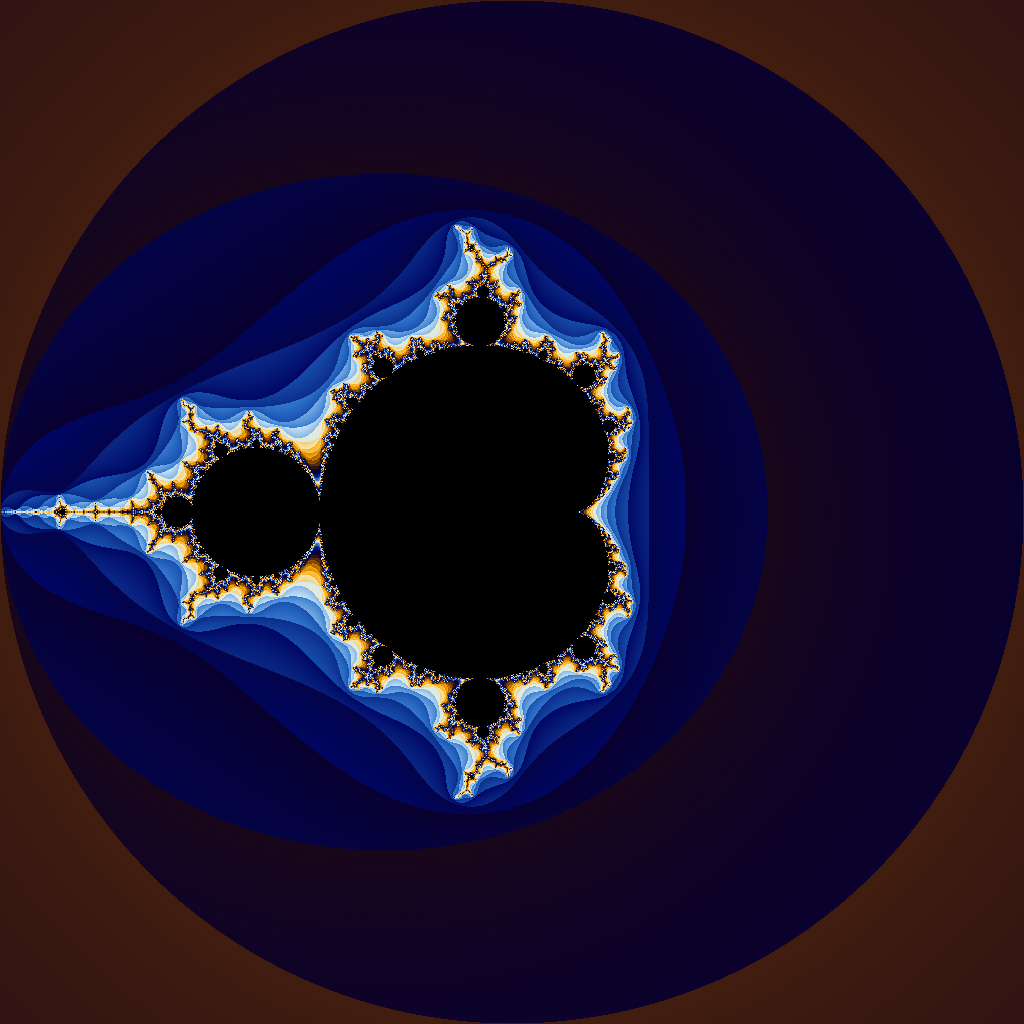

In [7]:
generate_mbrot(-2, 2, -2, 2, 1024, 1024)

In [ ]:
generate_mbrot(-2, 2, -2, 2, 1024, 1024)

In [ ]:
z = -0.16958678742245276-0.7953145979181738j

In [ ]:
log2(abs(z))

In [ ]:
maxIt

In [ ]:
c = 3.4008565058210753

In [ ]:


( - c)

In [ ]:
low, high